In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/My Drive/DUMPYARD GROUP 32/Mini/final.csv',index_col=0)
sub_set=df['subject'].unique()
lab=['label']
dfs= dict(tuple(df.groupby("subject")))
df.head()



,Unnamed: 0.1,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,ACC_y_min,ACC_y_max,ACC_z_mean,ACC_z_std,ACC_z_min,ACC_z_max,BVP_mean,BVP_std,BVP_min,BVP_max,EDA_mean,EDA_std,EDA_min,EDA_max,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,EDA_smna_std,EDA_smna_min,EDA_smna_max,EDA_tonic_mean,EDA_tonic_std,EDA_tonic_min,EDA_tonic_max,Resp_mean,Resp_std,Resp_min,Resp_max,TEMP_mean,TEMP_std,TEMP_min,TEMP_max,BVP_peak_freq,TEMP_slope,subject,label,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,0,0.029937,0.009942,0.000000,0.087383,0.029510,0.011145,-0.024082,0.087383,0.000020,0.000008,-0.000017,0.000060,0.000020,0.000008,-0.000017,0.000060,-0.181673,107.648359,-358.13,554.77,1.397968,0.141481,1.109299,1.678399,1.824289,1.088328,0.367977,4.319987,1.284376,1.952823,5.229657e-08,11.712596,1.232164,0.997487,-0.599164,2.554750,0.148184,2.935617,-8.805847,6.504822,35.817091,0.012674,35.79,35.84,0.135670,-0.000169,2,1,27,175,80,0,1,0,0,1,0,0
1,0,0.021986,0.015845,0.000000,0.071558,0.017352,0.020817,-0.037843,0.071558,0.000012,0.000014,-0.000026,0.000049,0.000012,0.000014,-0.000026,0.000049,-0.830147,118.742089,-392.28,438.16,1.210132,0.091882,1.014138,1.485800,2.109146,1.223528,0.539150,4.459367,1.467865,2.852510,3.096902e-08,17.418821,0.377615,1.172221,-1.213173,1.871490,0.037545,2.843123,-8.168030,6.742859,35.797568,0.029901,35.75,35.87,0.095023,-0.000789,2,1,27,175,80,0,1,0,0,1,0,0
2,0,0.020839,0.011034,0.002752,0.054356,0.020839,0.011034,0.002752,0.054356,0.000014,0.000008,0.000002,0.000037,0.000014,0.000008,0.000002,0.000037,0.939683,42.190039,-240.61,209.89,1.010977,0.102315,0.832216,1.190967,0.152828,0.128896,0.006950,0.544346,0.105091,0.244891,4.725602e-08,1.300810,1.727696,0.293389,1.137304,2.037179,-0.021862,1.700333,-2.914429,3.260803,35.712909,0.027612,35.66,35.75,0.076880,-0.000717,2,1,27,175,80,0,1,0,0,1,0,0
3,0,0.034449,0.003185,0.013761,0.040595,0.034449,0.003185,0.013761,0.040595,0.000024,0.000002,0.000009,0.000028,0.000024,0.000002,0.000009,0.000028,0.107404,41.606872,-289.26,145.36,0.775187,0.046391,0.693996,0.876819,0.177595,0.126167,0.002789,0.361388,0.110786,0.199704,2.787285e-08,1.105898,0.987927,0.042388,0.912441,1.127602,0.097563,1.483260,-2.818298,3.730774,35.700811,0.019504,35.66,35.73,0.140271,0.000075,2,1,27,175,80,0,1,0,0,1,0,0
4,0,0.028870,0.004379,0.013761,0.038531,0.028870,0.004379,0.013761,0.038531,0.000020,0.000003,0.000009,0.000027,0.000020,0.000003,0.000009,0.000027,-0.073620,43.121633,-197.37,194.12,0.657494,0.034540,0.594667,0.718106,0.035014,0.039616,0.001144,0.132781,0.026716,0.114738,5.174644e-08,0.997037,0.772262,0.077628,0.615685,0.907833,0.062545,1.501585,-3.242493,2.912903,35.744727,0.019386,35.71,35.79,0.149321,0.000442,2,1,27,175,80,0,1,0,0,1,0,0


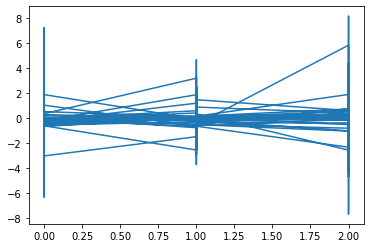

In [ ]:
plt.plot(df.label,df.BVP_mean)

In [ ]:
from sklearn.model_selection import train_test_split 
def to_test_train(df):

    X=df.drop(['label','subject'],axis=1).values
    y=df['label'].values
    X_tr,X_te,y_tr,y_te=train_test_split(X,y,test_size=0.3,random_state=41)
    # print(X_tr.shape)
    # print(X_te.shape)
    # print(y_tr.shape)
    # print(y_te.shape)
    # print(y_tr)
    return X_tr,y_tr,X_te,y_te

In [ ]:
def accuracy(y_pred,y_te):
    er=0
    for j in range(y_te.shape[0]):
        if y_pred[j]==y_te[j]:
            er+=1
    return er/y_te.shape[0]

**TAKING ALL THE SUBJECTS FOR CLASSIFICATION**

In [ ]:
X_tr_all,y_tr_all,X_te_all,y_te_all=to_test_train(df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=150,random_state=0,min_samples_split=2)
clf.fit(X_tr_all,y_tr_all)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_all=clf.predict(X_te_all)

In [ ]:
print("Taking all subjects accuracy is",accuracy(y_pred_all,y_te_all)*100,"%")

Taking all subjects accuracy is 94.91525423728814 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
print("F1 Score",f1_score(y_te_all, y_pred_all, average="macro"))
print("Precision Score",precision_score(y_te_all, y_pred_all, average="macro"))
print("Recall Score",recall_score(y_te_all, y_pred_all, average="macro"))

F1 Score 0.9369999704332538
Precision Score 0.94997964997965
Recall Score 0.9270659254080806


**TAKING EACH SUBJECT AND TRAINING THE MODEL INDIVIDUALLY**

In [ ]:
# Random Forest Classifier
ac=[]
pred=[]
test=[]
from sklearn.ensemble import RandomForestClassifier
for i in dfs:
    X_tr,y_tr,X_te,y_te=to_test_train(dfs[i])
    clf=RandomForestClassifier(n_estimators=150,random_state=0,min_samples_split=2)
    clf.fit(X_tr,y_tr) 
    y_pred=clf.predict(X_te)
    pred.append(y_pred)
    test.append(y_te)
    acc=accuracy(y_pred,y_te)
    print("Accuracy for subject:", i,"is",acc*100,"%")
    ac.append(acc*100)

Accuracy for subject: 2 is 100.0 %
Accuracy for subject: 3 is 91.66666666666666 %
Accuracy for subject: 4 is 95.65217391304348 %
Accuracy for subject: 5 is 100.0 %
Accuracy for subject: 6 is 100.0 %
Accuracy for subject: 7 is 91.66666666666666 %
Accuracy for subject: 8 is 100.0 %
Accuracy for subject: 9 is 100.0 %
Accuracy for subject: 10 is 96.0 %
Accuracy for subject: 11 is 100.0 %
Accuracy for subject: 13 is 100.0 %
Accuracy for subject: 14 is 100.0 %
Accuracy for subject: 15 is 100.0 %
Accuracy for subject: 16 is 100.0 %
Accuracy for subject: 17 is 100.0 %


In [ ]:
ac=np.array(ac)
print("Mean Accuracy is",np.mean(ac),"%")

Mean Accuracy is 98.33236714975845 %


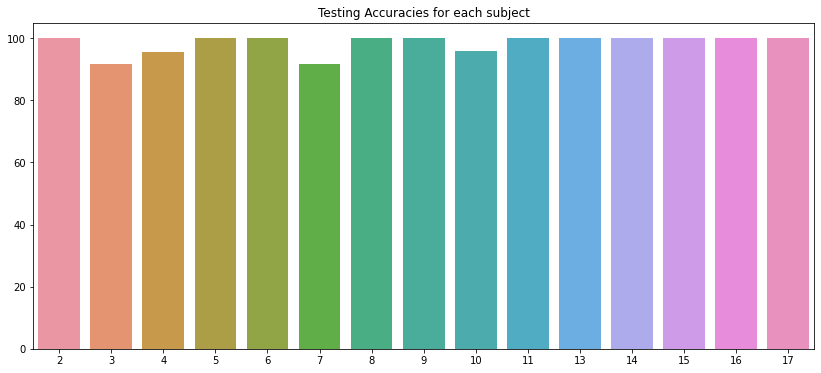

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
plt.title('Testing Accuracies for each subject')
sns.barplot(x=sub_set, y=ac);

**MODEL** **EVALUATION**

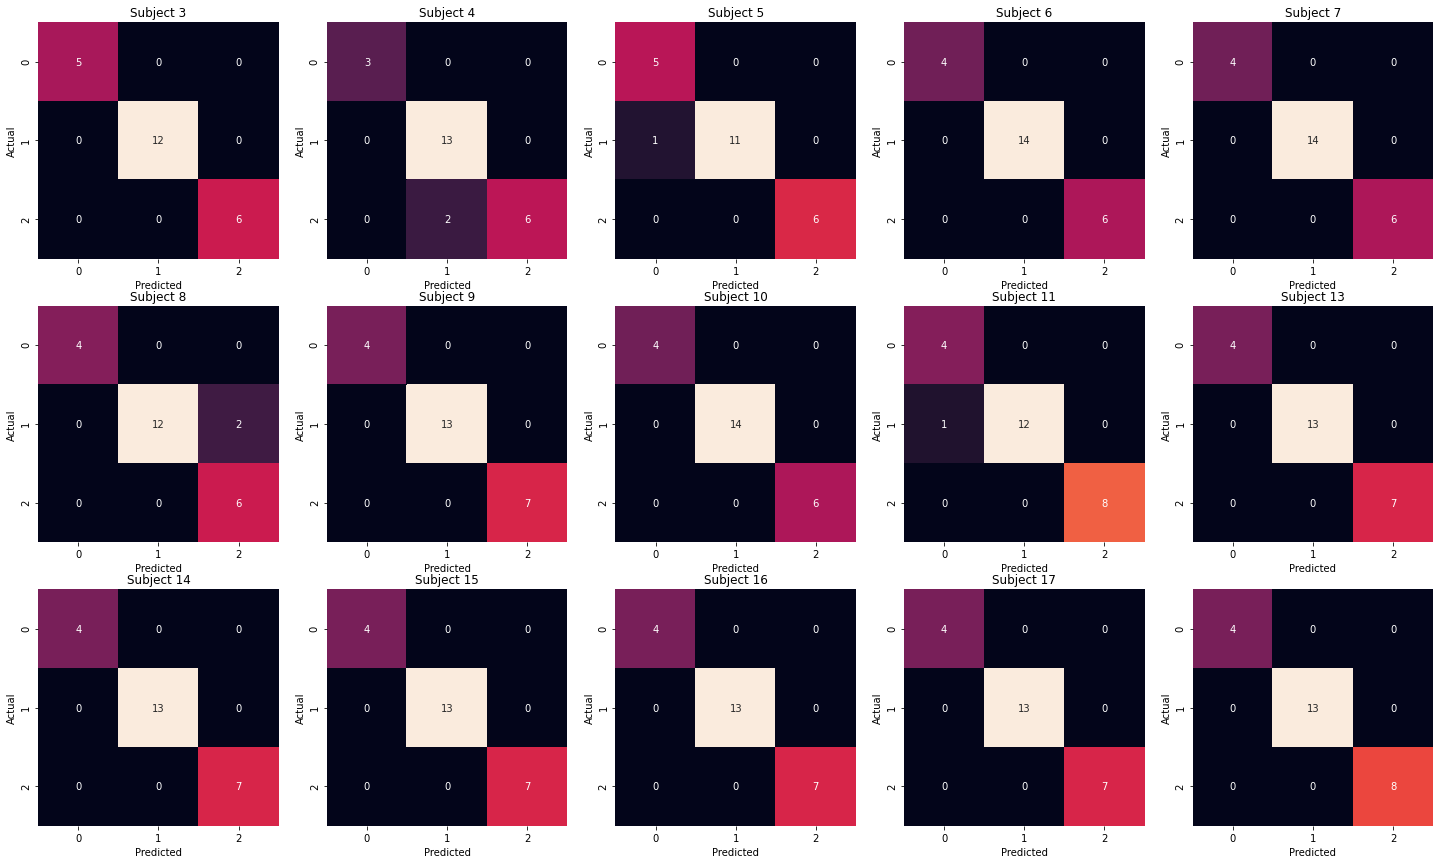

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(25,20))
it=0
for i in dfs:
    conf=confusion_matrix(test[it],pred[it])
    plt.title(f'Subject {i}')
    plt.subplot(4,5,it+1)
    sns.heatmap(conf, annot=True, fmt='d', cbar=False);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    it+=1
# plt.figure(figsize=(4,5))


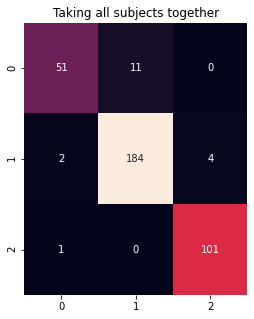

In [ ]:
con=confusion_matrix(y_te_all,y_pred_all)
plt.figure(figsize=(4,5))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Taking all subjects together')
sns.heatmap(con, annot=True, fmt='d', cbar=False)
plt.show()

In [ ]:
X_tr_all,y_tr_all,X_te_all,y_te_all=to_test_train(df)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
DCT=DecisionTreeClassifier()
DCT.fit(X_tr_all,y_tr_all)
pred=DCT.predict(X_te_all)
print(accuracy(pred,y_te_all)*100,"%")

92.65536723163842 %


In [ ]:
print("F1 Score",f1_score(y_te_all, pred, average="macro"))
print("Precision Score",precision_score(y_te_all,pred, average="macro"))
print("Recall Score",recall_score(y_te_all, pred, average="macro"))

F1 Score 0.9143556215432436
Precision Score 0.9150057118807119
Recall Score 0.9138963791515474


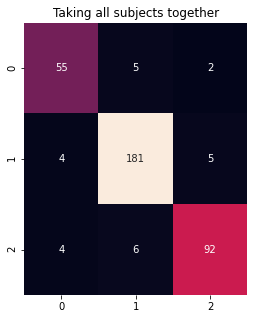

In [ ]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_te_all,pred)
plt.figure(figsize=(4,5))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Taking all subjects together')
sns.heatmap(con, annot=True, fmt='d', cbar=False)
plt.show()

In [ ]:
LDA=LinearDiscriminantAnalysis()

LDA.fit(X_tr_all,y_tr_all)
pred=LDA.predict(X_te_all)
print(accuracy(pred,y_te_all))

0.8022598870056498


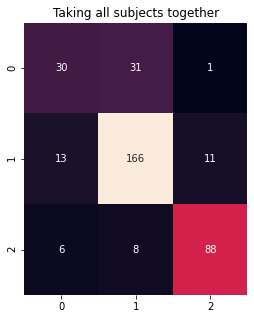

In [ ]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_te_all,pred)
plt.figure(figsize=(4,5))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Taking all subjects together')
sns.heatmap(con, annot=True, fmt='d', cbar=False)
plt.show()